# Question 1: Bellman Policy Equations

Given deterministic policy $\pi_D: \mathcal{S} \to \mathcal{A}$

- $V^{\pi_D} \sim Q^{\pi_D}$:

$V^{\pi_D}(s) = Q^{\pi_D} (s,\pi_D(s))$  for all $s \in \mathcal{S}$.

- $Q^{\pi_D} \sim V^{\pi_D}$:

$Q^{\pi_D}(s, a) = \mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in N} \mathcal{P} (s,a,s') \cdot V^{\pi_D}(s')$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. 



- $V^{\pi_D} \sim V^{\pi_D}$:

$V^{\pi_D}(s)= \mathcal{R}(s,\pi_D(s)) +\gamma \cdot \sum_{s' \in \mathcal{N}}\mathcal{P}(s,a,s')\cdot V^{\pi_D} (s')$ for all $s \in \mathcal{S}$.


- $Q^{\pi_D} \sim Q^{\pi_D}$:

$Q^{\pi_D}(s, a) = \mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in N} \mathcal{P} (s,a,s')  Q^{\pi_D} (s', \pi_D(s'))$ for all $s \in \mathcal{S}$ and $a \in \mathcal{A}$. 



# Question 2: MDP with inifinte states.


Problem Setup:

- transition probabilities: $\mathbb{P} [s+1|s,a] = a, ~ \mathbb{P} [s|s,a] = 1-a$, for all $s\in \mathcal{S}$ for all $a\in [0,1]$. $\gamma = 0.5$.
- rewards: $s \to s+1: 1-a; ~ s \to s: 1+a$

Tasks:
- Calculate Optimal Value Function $V^\star(s)$ for all $s\in\mathcal{S}$ using MDP Bellman Optimality Eq.
- Calculate an optimal deterministiic policy $\pi^\star(s)$ for all $s\in \mathcal{S}$.

Reward function:

$$\begin{aligned}
 \mathbb{P} [s+1|s,a] = a, ~ \mathbb{P} [s|s,a] = 1-a,\\
  \mathcal{R}_T (s,a, s+1) = 1-a, ~  \mathcal{R}_T (s,a, s) = 1+a\\
\end{aligned}$$

$$\begin{aligned}
\mathcal{R}(s,a) &= \mathbb{E} [R_{t+1} |S_t =s, A_t=a] \\
 &= \sum_{s'\in S} \mathcal{P}(s,a,s')\cdot \mathcal{R}_T(s,a,s')\\
 &=a\times(1-a) + (1-a)(1+a)\\
 &=1+a-2a^2
\end{aligned}$$

$\begin{aligned}
V^\star(s) &= max_{a\in \mathcal{A}} \{\mathcal{R}(s,a) +\gamma \cdot \sum_{s' \in \mathcal{N}} \mathcal{P}(s,a,s')\cdot V^\star(s')\}\\
&= max_{a\in[0,1]} \{1+a-2a^2 + \gamma (a\times V^\star(s)+(1-a) \times V^\star(s)\}\\
&= max_{a\in[0,1]} \{1+a-2a^2 + \gamma  V^\star(s)\}\\
(1-\gamma)V^\star(s)  &= max_{a\in[0,1]} \{1+a-2a^2\}\\
max_{a\in[0,1]} \{1+a-2a^2\} & = 1.125 ~ \text{when} ~ 1-4a=0 \\
V^\star(s)  &= \frac{max_{a\in[0,1]} \{1+a-2a^2\}}{1-\gamma)} = \frac{1.125}{0.5}=2.25\\
\end{aligned}$

Therefore, the optimal value function is $V^\star(s)=2.25$, optimal policy is $\pi^\star(s) = 0.25$.


# Question 3: Lilypads

## Part 1: Mathematical Expressions

- State Space: $\mathcal{S} = \{i|0 \leq i \leq n\}$ (i is the numbering of the lilypads). $\mathcal{T} = \{i|i=0, i=n\}$
- Action Space: $\mathcal{A} = \{A, B\}$
- State transitions function

$\begin{equation}
  Pr[i'|(i,A)] ~ \text{for} ~ 1\leq i \leq n-1  =
    \begin{cases}
      \frac{i}{n} & \text{for} ~ i'=i-1\\
      \frac{n-i}{n}& \text{for} ~ i'=i+1\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}$

$\begin{equation}
  Pr[i'|(i,B)] ~ \text{for} ~ 1\leq i \leq n-1  =
    \begin{cases}
      \frac{1}{n} & \text{for all } ~ 0 \leq i' \leq n ~\text{and}~ i' \neq i\\
      0 & \text{otherwise}
    \end{cases}       
\end{equation}$

- Rewards function $R(i,a,i')$

$R(i,a,i') ~ \text{for} ~ 1\leq i \leq n-1, a \in \{A,B\} = 
    \begin{cases}
      1 ~\text{for}~ i' \neq n\\
      0 & \text{otherwise}
    \end{cases}   
$

## Part 2: Code MDP (FiniteMarkovDecisionProcess )

In [35]:
import sys
sys.path
sys.path.append('/Users/mulingsi/Desktop/MSE346/RL-book/')
sys.path.append('/Users/mulingsi/Desktop/MSE346/MDP-DP-RL-master/src/')
from processes.mdp_refined import MDPRefined
from typing import Sequence, Mapping, Tuple, NoReturn

import itertools
from dataclasses import dataclass
from typing import Tuple, Dict
from rl.markov_decision_process import FiniteMarkovDecisionProcess
from rl.markov_decision_process import FinitePolicy, StateActionMapping
from rl.markov_process import FiniteMarkovProcess, FiniteMarkovRewardProcess
from rl.distribution import Categorical, Constant
from scipy.stats import poisson

import numpy as np

In [12]:
@dataclass(frozen=True)
class LilypadState:
    lilypad: int
        
LilypadSoundMapping = StateActionMapping[LilypadState, str]

class FrogEscapeMDP(FiniteMarkovDecisionProcess[LilypadState, str]):
    
    def __init__(self, num_lilypads:int):
        self.num_lilypads = num_lilypads 
        super().__init__(self.get_action_transition_reward_map())

    def get_action_transition_reward_map(self) -> LilypadSoundMapping:
        d: Dict[LilypadState, Dict[str, Categorical[Tuple[LilypadState,float]]]] = {}
            
        d[0] = None
        d[self.num_lilypads] = None
        
        for lilypad in range(1,self.num_lilypads):
            state: LilypadState = LilypadState(lilypad)
            d1: Dict[str,Categorical[Tuple[LilypadState, float]]] = {}

            # sound A
            sr_probs_dict_a: Dict[Tuple[LilypadState, float], float] = {}
            sr_probs_dict_a[(LilypadState(lilypad - 1), 0)] = lilypad / (self.num_lilypads)
            if lilypad + 1 == self.num_lilypads:
                sr_probs_dict_a[(LilypadState(lilypad + 1), 1)] = 1 - lilypad/(self.num_lilypads)
            else:
                sr_probs_dict_a[(LilypadState(lilypad + 1), 0)] = 1 - lilypad /(self.num_lilypads)
            d1['A'] = Categorical(sr_probs_dict_a)

            # sound B
            sr_probs_dict_b: Dict[Tuple[LilypadState, float], float] = {}
            for i in range(self.num_lilypads+1):
                if i != lilypad:
                    if i == self.num_lilypads :
                        sr_probs_dict_b[(LilypadState(i), 1)] = 1/(self.num_lilypads)
                    else:
                        sr_probs_dict_b[(LilypadState(i), 0)] = 1 /(self.num_lilypads)
            d1['B'] = Categorical(sr_probs_dict_b)

            d[state] = d1
        return d


In [14]:
from rl.dynamic_programming import evaluate_mrp_result

In [36]:
def get_policy_val_funct(
    frog_MDP: FrogEscapeMDP,
    fdp: FinitePolicy,
    gamma: float = 1
) -> np.ndarray:
    implied_mrp: FiniteMarkovRewardProcess[LilypadState] =\
            frog_mdp.apply_finite_policy(fdp)
    return implied_mrp.get_value_function_vec(gamma=gamma)

In [118]:
def get_all_val(number_of_lilypads: int, user_gamma=int):
    frog_mdp: FrogEscapeMDP = FrogEscapeMDP(number_of_lilypads)
    # CREATING ALL POSSIBLE DETERMINISTIC POLICIES
    policies = list(itertools.product(['A', 'B'], repeat=number_of_lilypads-1)) 
    val_function_map = {}
    for policy in policies:
        fdp: FinitePolicy[LilypadState, int] = FinitePolicy(
            {LilypadState(padnum):
            Constant(policy[padnum-1 ]) for padnum in range(1,number_of_lilypads)}
        )
        implied_mrp_tmp: FiniteMarkovRewardProcess[LilypadState] =\
            frog_mdp.apply_finite_policy(fdp)
        val_function_map[policy] = implied_mrp_tmp.get_value_function_vec(gamma=user_gamma)
    return val_function_map

In [119]:
def find_optimal(val_function_map):
    V_star = val_function_map[list(val_function_map.keys())[0]]
    for i, policy in enumerate(val_function_map):
        if np.all(val_function_map[policy] >= V_star) :
            V_star = val_function_map[policy] 
    pol_star = []        
    for policy in val_function_map.keys():
        if np.all(val_function_map[policy]  == V_star):
            pol_star = pol_star + [policy]
    return V_star, pol_star

## Part 3: n = 3, 6, 9

In [120]:
optimal_v = {}
optimal_p = {}
for num_pads in [3, 6, 9]:
    print('----------------------------------------')
    print('when there are '+ str(num_pads) +' lilypads......')
    optimal_v[num_pads],optimal_p[num_pads] = find_optimal(get_all_val(number_of_lilypads=num_pads, user_gamma=1))
    print('the optimal values (escape prob) are: ')
    print(optimal_v[num_pads])
    print('the optimal policies are: ')
    print(optimal_p[num_pads])
    print('----------------------------------------')

----------------------------------------
when there are 3 lilypads......
the optimal values (escape prob) are: 
[0.57142857 0.71428571]
the optimal policies are: 
[('B', 'A')]
----------------------------------------
----------------------------------------
when there are 6 lilypads......
the optimal values (escape prob) are: 
[0.65957447 0.70212766 0.72340426 0.74468085 0.78723404]
the optimal policies are: 
[('B', 'A', 'A', 'A', 'A')]
----------------------------------------
----------------------------------------
when there are 9 lilypads......
the optimal values (escape prob) are: 
[0.67567568 0.70523649 0.71368243 0.71790541 0.72128378 0.72550676
 0.7339527  0.76351351]
the optimal policies are: 
[('B', 'A', 'A', 'A', 'A', 'A', 'A', 'A')]
----------------------------------------


The pattern we observe for the Optimal Policy as we vary n is that for i = 1, the Optimal Action is Croak B and for $2\leq i \leq n−1$, the optimal action is Croak A.

In [121]:
import matplotlib.pyplot as plt

In [125]:
c_map = {'A': 'g','B':'b'}

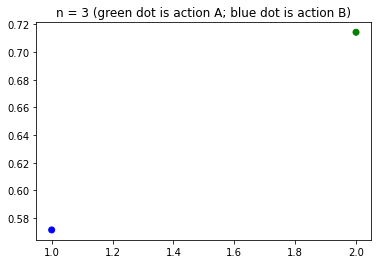

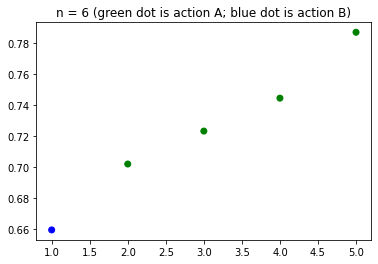

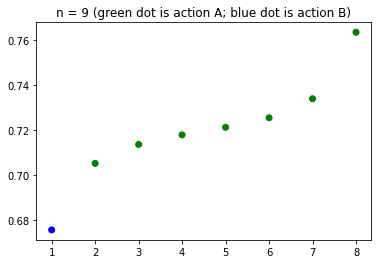

In [139]:
for n in optimal_v.keys():
    plt.scatter(range(1, n), optimal_v[n], c=  [c_map[i] for i in optimal_p[n][0]])
    plt.title('n = ' + str(n) + ' (green dot is action A; blue dot is action B)')
    plt.show()

# Question 4

Continuous-states, continuous-actions, discrete-time, non-terminating MDP.

**Objective**: Minimize the inifnite-horizon expected discounted sum of costs (solve for special case $\gamma = 0$) and derive analytic expression for optimal action & corresponding optimal cost.


$\begin{aligned}
V^\star(s) &= max_{a \in \mathbb{R}} \{\mathbb{E}_{s'\sim N(s,\sigma^2)} [-e^{as'}] \} \\
 &= max_{a \in \mathbb{R}} \{ \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{-\frac{(x-s)^2}{s\sigma^2}
} \cdot e^{ax} \cdot dx\} \\
 &= max_{a \in \mathbb{R}} \{ \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{-\frac{(x-(s +a\sigma^2))^2}{s\sigma^2}
} \cdot e^{sa+\frac{\sigma^2a^2}{2}} \cdot dx\} \\
 &= max_{a \in \mathbb{R}} \{-e^{sa+\frac{\sigma^2 a^2}{2}} \cdot
 \int_{-\infty}^\infty \frac{1}{\sqrt{2\pi}\sigma}\cdot e^{-\frac{(x-(s +a\sigma^2))^2}{s\sigma^2}
}\cdot dx\} \\
 &= max_{a \in \mathbb{R}} \{-e^{sa+\frac{\sigma^2 a^2}{2}} \cdot
 \mathbb{E}_{x ~ \sim N (s+a\sigma^2, \sigma^2)}[1]\} \\
 &= max_{a \in \mathbb{R}} \{-e^{sa+\frac{\sigma^2 a^2}{2}}\}
\end{aligned}$

The optimal policy $a^\star = argmax_a V^\star(s)$ could be derived via: 

$\begin{aligned}
\frac{\partial\{-e^{sa+\frac{\sigma^2 a^2}{2}}\}}{\partial a} = 0 ~ &\to ~ s + a^\star \sigma^2=0 \\
&\to a^\star = \frac{-s}{\sigma^2} ~ \text{(optimal policy)}
\end{aligned}$

Since the second order derivative  on $-e^{sa+\frac{\sigma^2 a^2}{2}}$: $\frac{\partial^2\{-e^{sa+\frac{\sigma^2 a^2}{2}}\}}{\partial^2 a} < 0$ for  $a =  a^\star = \frac{-s}{\sigma^2}$, $a^\star$ indeed maximizes  $-e^{sa+\frac{\sigma^2 a^2}{2}}$ and $V^\star (s)= -e^{sa^\star+\frac{\sigma^2 a^\star2}{2}} =-e^{-\frac{s^2}{2\sigma^2}}$. Therefore the optimal cost is $e^{-\frac{s^2}{2\sigma^2}}$